In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [3]:
adata=sc.read(pref+'.guide_qc.h5ad')
adata

Only considering the two last: ['.guide_qc', '.h5ad'].
Only considering the two last: ['.guide_qc', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [4]:
#filter 
#- working guides
#- cell state 1

#FILTERING
cell_state_cells=set(adata.obs_names[adata.obs['cell_state']=='state1'])
guide_qc_cells=set(adata.obs_names[adata.obs['guide_qc']=='passed'])
keep=list(cell_state_cells.intersection(guide_qc_cells))
print(len(keep))

adata=adata[keep,:]
adata._init_as_actual(adata.copy())
adata

38677


AnnData object with n_obs × n_vars = 38677 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [5]:
#DE analysis using scanpy

def DE(adata_here,reference,groupby,fdr=0.01,use_raw=False,compute_lfc=False):

    if use_raw:
        genes=adata_here.raw.var_names
    else:
        genes=adata_here.var_names
        
    groupby_options=list(set(adata_here.obs[groupby]).difference(set([reference])))

    sc.tl.rank_genes_groups(adata_here,groupby=groupby,n_genes=len(genes), 
                            reference=reference,
                            use_raw=use_raw,rankby_abs=True,
                            method='t-test_overestim_var',
                            #corr_method='bonferroni',
                           )

    pval_mat=pd.DataFrame(index=groupby_options,columns=genes,dtype=float)
    sign_mat=pd.DataFrame(index=groupby_options,columns=genes,dtype=float)
    
    #bulkify
    bulk=perturb.tl.bulk(adata_here,grouping_variable=groupby,by_batch=False,
                         return_matrix=True)
    #subtract the control from the bulk to get the sign
    sign_mat_full=bulk-bulk.loc[reference,:]
    
    if compute_lfc:
        lfc_mat=pd.DataFrame(index=groupby_options,columns=genes,dtype=float)
    
    for groupby_option in groupby_options:
        if groupby_option==reference:
            continue
        df_here=sc.get.rank_genes_groups_df(adata_here,group=groupby_option)
        df_here.index=list(df_here['names'])
        #pvalue
        pval_mat.loc[groupby_option,:]=df_here.loc[genes,'pvals_adj']
        if compute_lfc:
            lfc_mat.loc[groupby_option,:]=df_here.loc[genes,'logfoldchanges']
        sign_mat.loc[groupby_option,:]=np.sign(sign_mat_full.loc[groupby_option,genes])
        
    signed_pval_mat=pd.DataFrame(np.multiply(-np.log10(pval_mat),np.sign(sign_mat)),
                                 index=groupby_options,columns=genes,dtype=float)
    return(signed_pval_mat)


In [6]:
adata

AnnData object with n_obs × n_vars = 38677 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

Note
==

In my old analyses (notebook 2020-11-24_FastFigures), i had used raw expression during the DE test. That accounts for the qualitative differences. We will use the batch-corrected z-scored data, for the paper and correct this error.

To be conservative and consistent with Alex, using the raw data.





In [47]:
FDR=0.01
de_single=DE(adata,reference='control',groupby='gene.compact',
             fdr=FDR,use_raw=False)

ranking genes
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


In [48]:
import copy
signed_pval_mat=de_single

Venns
==

In [49]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

SMARCA4 comparisons
===

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


21868
[[  738   605]
 [ 1023 19502]]
(23.25436610843169, 0.0)
fraction of  ARID1A genes 0.4190800681431005
1.2198347107438017 0.04678068410462777 26.07560650493202


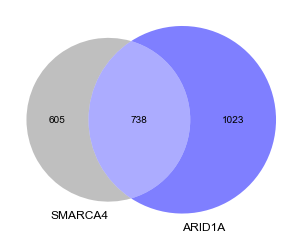

In [50]:
#smarca4 + each complex

fdr_log=2

gene='ARID1A'
#get the data for the venn
baf_dict={'SMARCA4':['SMARCA4'],
         gene:[gene]}
baf_DEs={}
#intersect all DE genes by complex 
for baf in baf_dict:
    genes=baf_dict[baf]
    pvals=signed_pval_mat.loc[genes,:]
    mins=pvals.min(axis=0)
    maxs=pvals.max(axis=0)
    mins_sig=(np.abs(mins)>=fdr_log)   
    maxs_sig=(np.abs(maxs)>=fdr_log)
    same_sign=(np.sign(mins)==np.sign(maxs))
    keep=(mins_sig+maxs_sig)>0
    keep_genes=signed_pval_mat.columns[keep]
    baf_DEs[baf]=keep_genes
    
subsets=[]
s=set(baf_DEs['SMARCA4'])
gene_de=set(baf_DEs[gene])

s_genes=list(s)
gene_de_genes=list(gene_de)
overlap_genes=list(s.intersection(gene_de))

subsets.append(len(s.difference(gene_de)))
subsets.append(len(list(gene_de.difference(s))))
subsets.append(len(overlap_genes))

venn2(subsets = subsets,
      set_labels = ('SMARCA4',gene), alpha = 0.5,
     set_colors=['gray','blue']);


#compute hypergeometric stats
def hypergeom_test(g1,g2,overlap,totals):
    
    from scipy.stats import fisher_exact
    #make 2x2 table
    contingency_table=np.array([[overlap,g1-overlap],[g2-overlap,totals-g1-g2+overlap]])
    print(contingency_table)
    oddsr, p = fisher_exact(contingency_table, alternative='two-sided')
    return(oddsr,p)

totals=signed_pval_mat.shape[1]
print(totals)
print(hypergeom_test(len(s_genes),len(gene_de_genes),len(overlap_genes),
                    totals))
print('fraction of ',gene,'genes',len(overlap_genes)/len(gene_de_genes))
a=len(overlap_genes)/(len(s_genes)-len(overlap_genes))
b=(len(gene_de_genes)-len(overlap_genes))/totals
print(a,b,a/b)



plt.savefig(FIGS+'/VennDEsSMARCA4_vs_'+gene+'.pdf',transparent=True,bbox_inches='tight') 
plt.savefig(FIGS+'/VennDEsSMARCA4_vs_'+gene+'.png',transparent=True,bbox_inches='tight') 

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


21868
[[  568   775]
 [  425 20100]]
(34.66201138519924, 0.0)
fraction of  BRD9 genes 0.5720040281973817
1.336470588235294 0.03543991220047558 37.71088880455408


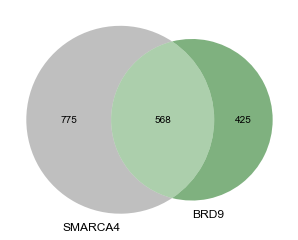

In [51]:
gene='BRD9'
#get the data for the venn
baf_dict={'SMARCA4':['SMARCA4'],
         gene:[gene]}
baf_DEs={}
#intersect all DE genes by complex 
for baf in baf_dict:
    genes=baf_dict[baf]
    pvals=signed_pval_mat.loc[genes,:]
    mins=pvals.min(axis=0)
    maxs=pvals.max(axis=0)
    mins_sig=(np.abs(mins)>=fdr_log)   
    maxs_sig=(np.abs(maxs)>=fdr_log)
    same_sign=(np.sign(mins)==np.sign(maxs))
    keep=(mins_sig+maxs_sig)>0
    keep_genes=signed_pval_mat.columns[keep]
    baf_DEs[baf]=keep_genes
    
subsets=[]
s=set(baf_DEs['SMARCA4'])
gene_de=set(baf_DEs[gene])

s_genes=list(s)
gene_de_genes=list(gene_de)
overlap_genes=list(s.intersection(gene_de))

subsets.append(len(s.difference(gene_de)))
subsets.append(len(list(gene_de.difference(s))))
subsets.append(len(overlap_genes))

venn2(subsets = subsets,
      set_labels = ('SMARCA4',gene), alpha = 0.5,
     set_colors=['gray','darkgreen']);

totals=signed_pval_mat.shape[1]
print(totals)
print(hypergeom_test(len(s_genes),len(gene_de_genes),len(overlap_genes),
                    totals))
print('fraction of ',gene,'genes',len(overlap_genes)/len(gene_de_genes))
a=len(overlap_genes)/(len(gene_de_genes)-len(overlap_genes))
b=(len(s_genes)-len(overlap_genes))/totals
print(a,b,a/b)


plt.savefig(FIGS+'/VennDEsSMARCA4_vs_'+gene+'.pdf',transparent=True,bbox_inches='tight') 
plt.savefig(FIGS+'/VennDEsSMARCA4_vs_'+gene+'.png',transparent=True,bbox_inches='tight') 

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


21868
[[   31  1312]
 [   15 20510]]
(32.30741869918699, 4.096777253097963e-27)
fraction of  ARID2 genes 0.6739130434782609
2.066666666666667 0.05999634168648253 34.44654471544716


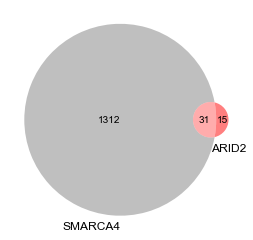

In [52]:
gene='ARID2'
#get the data for the venn
baf_dict={'SMARCA4':['SMARCA4'],
         gene:[gene]}
baf_DEs={}
#intersect all DE genes by complex 
for baf in baf_dict:
    genes=baf_dict[baf]
    pvals=signed_pval_mat.loc[genes,:]
    mins=pvals.min(axis=0)
    maxs=pvals.max(axis=0)
    mins_sig=(np.abs(mins)>=fdr_log)   
    maxs_sig=(np.abs(maxs)>=fdr_log)
    same_sign=(np.sign(mins)==np.sign(maxs))
    keep=(mins_sig+maxs_sig)>0
    keep_genes=signed_pval_mat.columns[keep]
    baf_DEs[baf]=keep_genes
    
subsets=[]
s=set(baf_DEs['SMARCA4'])
gene_de=set(baf_DEs[gene])

s_genes=list(s)
gene_de_genes=list(gene_de)
overlap_genes=list(s.intersection(gene_de))

subsets.append(len(s.difference(gene_de)))
subsets.append(len(list(gene_de.difference(s))))
subsets.append(len(overlap_genes))

venn2(subsets = subsets,
      set_labels = ('SMARCA4',gene), alpha = 0.5,
     set_colors=['gray','red']);

totals=signed_pval_mat.shape[1]
print(totals)
print(hypergeom_test(len(s_genes),len(gene_de_genes),len(overlap_genes),
                    totals))
print('fraction of ',gene,'genes',len(overlap_genes)/len(gene_de_genes))
a=len(overlap_genes)/(len(gene_de_genes)-len(overlap_genes))
b=(len(s_genes)-len(overlap_genes))/totals
print(a,b,a/b)

plt.savefig(FIGS+'/VennDEsSMARCA4_vs_'+gene+'.pdf',transparent=True,bbox_inches='tight') 
plt.savefig(FIGS+'/VennDEsSMARCA4_vs_'+gene+'.png',transparent=True,bbox_inches='tight') 

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


cBAF 1817
Index(['AURKAIP1', 'MRPL20', 'ATAD3A', 'RP1-140A9.1', 'RER1', 'RP11-46F15.2',
       'C1orf174', 'RPL22', 'ICMT', 'PARK7',
       ...
       'AL592528.1', 'COL6A1', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-ATP6',
       'MT-CO3', 'MT-ND3', 'MT-ND4', 'MT-ND6'],
      dtype='object', length=1817)
ncBAF 995
Index(['TNFRSF18', 'RP1-140A9.1', 'RP11-46F15.2', 'RP5-1092A11.5', 'C1orf174',
       'ESPN', 'ENO1', 'RP11-84A14.5', 'SRM', 'RP1-69M21.2',
       ...
       'ERVH48-1', 'CSTB', 'AIRE', 'TSPEAR-AS2', 'AL592528.1', 'COL6A1',
       'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CYB'],
      dtype='object', length=995)
PBAF 183
Index(['TNFRSF18', 'VWA1', 'PLEKHG5', 'SRM', 'FHAD1', 'RP11-84D1.2', 'COL16A1',
       'MARCKSL1', 'PABPC4', 'PDZK1IP1',
       ...
       'FTL', 'LILRB4', 'NLRP7', 'COMT', 'CTA-243E7.1', 'LGALS1', 'POLR2F',
       'A4GALT', 'AP000402.3', 'PDE9A'],
      dtype='object', length=183)


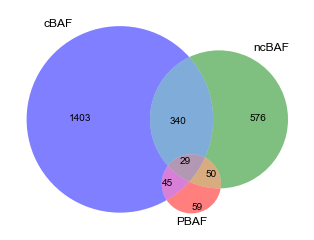

In [53]:
#get the data for the venn
baf_dict={'cBAF':['ARID1A','ARID1B','DPF2','DPF1','DPF2','DPF3',
                 ],
         'ncBAF':['BRD9',
                  'GLTSCR1','GLTSCR1L',
                 ],
         'PBAF':['ARID2',
                 'PHF10','BRD7','PBRM1',
                ]}
baf_DEs={}
#intersect all DE genes by complex 
for baf in baf_dict:
    genes=baf_dict[baf]
    pvals=signed_pval_mat.loc[genes,:]
    mins=pvals.min(axis=0)
    maxs=pvals.max(axis=0)
    mins_sig=(np.abs(mins)>=fdr_log)   
    maxs_sig=(np.abs(maxs)>=fdr_log)
    same_sign=(np.sign(mins)==np.sign(maxs))
    keep=(mins_sig+maxs_sig)>0
    print(baf,keep.sum())
    keep_genes=signed_pval_mat.columns[keep]
    print(keep_genes)
    baf_DEs[baf]=keep_genes
    
#now, venn
cbaf=set(baf_DEs['cBAF'])
ncbaf=set(baf_DEs['ncBAF'])
pbaf=set(baf_DEs['PBAF'])

subsets=[]
subsets.append(len(list(cbaf.difference(ncbaf).difference(pbaf))))
subsets.append(len(list(ncbaf.difference(cbaf).difference(pbaf))))
subsets.append(len(list(cbaf.intersection(ncbaf).difference(pbaf))))

subsets.append(len(list(pbaf.difference(ncbaf).difference(cbaf))))
subsets.append(len(list(cbaf.intersection(pbaf).difference(ncbaf))))
subsets.append(len(list(pbaf.intersection(ncbaf).difference(cbaf))))
subsets.append(len(list(cbaf.intersection(ncbaf).intersection(pbaf))))

overlaps={}
overlaps['cBAF_only']=list(cbaf.difference(ncbaf).difference(pbaf))
overlaps['ncBAF_only']=list(ncbaf.difference(cbaf).difference(pbaf))
overlaps['cBAF_ncBAF']=list(cbaf.intersection(ncbaf).difference(pbaf))

overlaps['PBAF_only']=list(pbaf.difference(ncbaf).difference(cbaf))
overlaps['cBAF_PBAF']=list(cbaf.intersection(pbaf).difference(ncbaf))
overlaps['ncBAF_PBAF']=list(pbaf.intersection(ncbaf).difference(cbaf))
overlaps['all']=list(cbaf.intersection(ncbaf).intersection(pbaf))


venn3(subsets = subsets,#(1566, 194, 295, 22, 34, 9, 28), 
      set_labels = ('cBAF', 'ncBAF', 'PBAF'), alpha = 0.5,
     set_colors=['blue','green','red']);

plt.savefig(FIGS+'/VennDEsComplex.pdf',transparent=True,bbox_inches='tight') 
plt.savefig(FIGS+'/VennDEsComplex.png',transparent=True,bbox_inches='tight') 

In [73]:
print(hypergeom_test(len(list(cbaf)),len(list(ncbaf)),len(list(cbaf.intersection(ncbaf))),
                    totals))
print(len(list(cbaf.intersection(ncbaf))))

[[  369  1448]
 [  626 19425]]
(7.907596464441424, 2.456577836687235e-151)
369


In [55]:
gos=perturb.tl.programs2go(overlaps)

cBAF_only
ncBAF_only
cBAF_ncBAF
PBAF_only
cBAF_PBAF
ncBAF_PBAF
all
('p_value2', 'Pro: all')
name
interleukin-8 production                           2.509622
negative regulation of interleukin-8 production    2.509622
regulation of interleukin-8 production             2.509622
Name: (p_value2, Pro: all), dtype: float64
('p_value2', 'Pro: cBAF_PBAF')
name
cytoplasmic translation                            3.740076
detoxification of copper ion                       3.740076
stress response to copper ion                      3.740076
detoxification of inorganic compound               3.652729
stress response to metal ion                       3.525212
response to cadmium ion                            3.212931
cellular response to zinc ion                      3.212931
cellular response to copper ion                    3.045305
detoxification                                     2.982904
cellular response to cadmium ion                   2.552820
cellular zinc ion homeostasis               

In [63]:
def print_terms(gos,cat):

    print(cat)
    if 'Pro: '+cat not in gos['p_value2']:
        print(cat,'not found')
    else:
        terms=gos['p_value2']['Pro: '+cat]
        terms=terms.sort_values(ascending=False)
        thresh=1
        for i in range(terms.shape[0]):
            if terms[i]>thresh:
                print(terms.index[i],np.round(terms.iloc[i],2))
    print('=====')
    
print_terms(gos,'cBAF_only')

cBAF_only
cellular macromolecule biosynthetic process 31.44
cellular macromolecule metabolic process 28.92
peptide metabolic process 28.84
peptide biosynthetic process 28.24
translation 28.08
amide biosynthetic process 24.46
cellular amide metabolic process 21.38
ribosome biogenesis 20.32
cytoplasmic translation 19.82
organonitrogen compound biosynthetic process 18.14
mitochondrial ATP synthesis coupled electron transport 17.94
ATP synthesis coupled electron transport 17.94
rRNA processing 17.35
cellular protein metabolic process 17.19
organonitrogen compound metabolic process 16.99
respiratory electron transport chain 16.55
oxidative phosphorylation 16.33
electron transport chain 15.56
aerobic electron transport chain 15.46
aerobic respiration 15.46
rRNA metabolic process 15.46
protein metabolic process 14.87
biosynthetic process 14.43
mitochondrion organization 14.43
cellular respiration 14.31
cellular biosynthetic process 13.69
organic substance biosynthetic process 13.57
ncRNA proc

In [70]:
print_terms(gos,'ncBAF_only')

ncBAF_only
multicellular organismal process 3.14
movement of cell or subcellular component 3.14
regulation of biological quality 2.73
biological regulation 2.64
response to stimulus 2.36
signal transduction 2.27
cell communication 2.25
locomotion 2.1
signaling 2.1
cell motility 1.89
regulation of cellular process 1.89
localization of cell 1.89
localization 1.89
cell surface receptor signaling pathway 1.8
positive regulation of locomotion 1.79
regulation of biological process 1.79
response to wounding 1.6
positive regulation of cell motility 1.56
regulation of localization 1.53
anatomical structure development 1.51
response to oxygen-containing compound 1.51
positive regulation of cell migration 1.51
cell migration 1.51
positive regulation of cellular component movement 1.51
regulation of response to stimulus 1.48
cellular response to stimulus 1.46
regulation of locomotion 1.33
multicellular organism development 1.33
regulation of cell motility 1.33
developmental process 1.33
positive r

In [65]:
print_terms(gos,'cBAF_ncBAF')

cBAF_ncBAF
ribosome biogenesis 5.9
positive regulation of biological process 4.38
translation 2.9
response to stimulus 2.9
peptide biosynthetic process 2.71
rRNA metabolic process 2.69
rRNA processing 2.69
cellular response to stimulus 2.69
regulation of cellular process 2.48
positive regulation of cellular process 2.24
amide biosynthetic process 2.24
positive regulation of gene expression 2.06
peptide metabolic process 2.05
developmental process 2.0
cell migration 1.91
cellular nitrogen compound biosynthetic process 1.85
actin cytoskeleton organization 1.85
positive regulation of multicellular organismal process 1.78
organonitrogen compound biosynthetic process 1.71
cellular macromolecule biosynthetic process 1.71
response to stress 1.71
localization of cell 1.68
cell motility 1.68
actin filament-based process 1.66
negative regulation of apoptotic process 1.59
regulation of apoptotic process 1.59
immune effector process 1.59
regulation of response to stimulus 1.59
regulation of biolog

In [71]:
print_terms(gos,'cBAF_PBAF')

cBAF_PBAF
detoxification of copper ion 3.74
cytoplasmic translation 3.74
stress response to copper ion 3.74
detoxification of inorganic compound 3.65
stress response to metal ion 3.53
cellular response to zinc ion 3.21
response to cadmium ion 3.21
cellular response to copper ion 3.05
detoxification 2.98
cellular response to cadmium ion 2.55
cellular zinc ion homeostasis 2.5
response to copper ion 2.48
zinc ion homeostasis 2.48
cellular transition metal ion homeostasis 2.12
response to zinc ion 2.08
homeostatic process 2.06
glyceraldehyde-3-phosphate biosynthetic process 2.06
response to toxic substance 1.9
transition metal ion homeostasis 1.83
glyceraldehyde-3-phosphate metabolic process 1.35
=====


In [72]:
print_terms(gos,'ncBAF_PBAF')

ncBAF_PBAF
cGMP catabolic process 1.71
=====


In [68]:
print_terms(gos,'PBAF')

PBAF
PBAF not found
=====


In [69]:
print_terms(gos,'all')

all
negative regulation of interleukin-8 production 2.51
regulation of interleukin-8 production 2.51
interleukin-8 production 2.51
=====


In [55]:
gos['p_value2']['Pro: all'].sort_values(ascending=False).iloc[:20]

name
regulation of interleukin-8 production                              2.314611
regulation of cytokine production                                   2.314611
interleukin-8 production                                            2.314611
negative regulation of interleukin-8 production                     2.314611
cytokine production                                                 2.314611
regulation of multicellular organismal process                      2.314611
positive regulation of viral process                               -0.000000
protein insertion into membrane                                    -0.000000
protein-DNA complex subunit organization                           -0.000000
protein targeting to mitochondrion                                 -0.000000
positive regulation of response to biotic stimulus                 -0.000000
protein metabolic process                                          -0.000000
protein localization to organelle                                  -0.0

In [50]:
import re
re.sub('\n','',gos['p_value2']['Pro: all'].sort_values(ascending=False).to_string())

"nameregulation of interleukin-8 production                                                       2.314611regulation of cytokine production                                                            2.314611interleukin-8 production                                                                     2.314611negative regulation of interleukin-8 production                                              2.314611cytokine production                                                                          2.314611regulation of multicellular organismal process                                               2.314611positive regulation of viral process                                                        -0.000000protein insertion into membrane                                                             -0.000000protein-DNA complex subunit organization                                                    -0.000000protein targeting to mitochondrion                                                    

In [74]:
signed_pval_mat.loc['SS18L',:].sort_values()

AURKAIP1   -0.203393
COA6       -0.203393
NOL7       -0.203393
MRPL15     -0.203393
ELANE      -0.203393
              ...   
DPYD        0.203393
USP37       0.203393
MRPL33      0.321563
LAPTM5      0.554449
MS4A6A      0.554449
Name: SS18L, Length: 21868, dtype: float64

In [75]:
#show me a list of how many genes DE per subunit
fdr_log=2
de_sigs=(signed_pval_mat.abs()>=fdr_log).sum(axis=1)
de_sigs=de_sigs.sort_values(ascending=False)
de_sigs=de_sigs.drop('unassigned')
print(de_sigs.shape)
print(de_sigs)

(28,)
SMARCB1     3885
SMARCC1     3559
SMARCD2     2999
SMARCD1     2616
ARID1A      1761
SMARCE1     1671
ACTL6A      1359
SMARCA4     1343
BRD9         993
SS18         289
DPF2         154
PBRM1        124
BCL7A         71
BRD7          63
ARID2         46
SMARCC2       13
GLTSCR1        8
PHF10          6
BCL7C          1
SMARCA2        1
ARID1B         1
SMARCD3        0
ACTL6B         0
SS18L          0
DPF1           0
GLTSCR1L       0
BCL7B          0
DPF3           0
dtype: int64


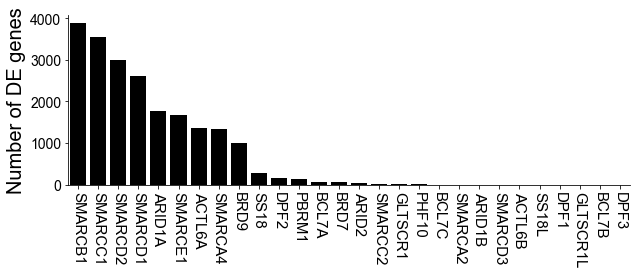

In [76]:
fig,plots=plt.subplots(1)
fig.set_size_inches(10,3)
vmin=-1
vmax=1

#expression level of genes
plots.bar(de_sigs.index,de_sigs
    ,color='black')
plots.grid(False)
#ax_top.set_xticks([])
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(True)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(True)
plots.set_xticks(range(len(de_sigs.index)))
plots.set_xticklabels(de_sigs.index,fontsize=15,rotation=270)
plots.xaxis.set_ticks_position('bottom')
plots.set_ylabel('Number of DE genes',fontsize=20)
plots.set_xlim(-0.5,len(de_sigs.index)-0.5)

plt.savefig(FIGS+'DEgenes.single.bar.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'DEgenes.single.bar.png',transparent=True,bbox_inches='tight')




(100.0, 3000.0)

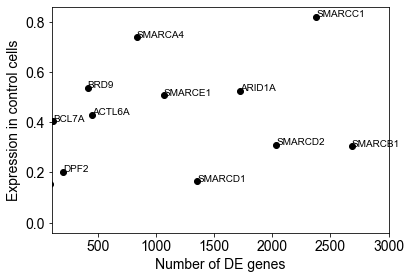

In [32]:
genes_here=list(de_sigs.index)
plt.scatter(de_sigs.loc[genes_here],adata.uns['target_gene_expr_in_control'].loc[genes_here,'expr'],
           color='black')
plt.grid(False)
for i, txt in enumerate(genes_here):
    plt.annotate(txt, (de_sigs.loc[genes_here][i], 
                      adata.uns['target_gene_expr_in_control'].loc[genes_here,'expr'][i]))
plt.xlabel('Number of DE genes')
plt.ylabel('Expression in control cells')
plt.xlim(100,3000)
    
    

In [33]:
adata

AnnData object with n_obs × n_vars = 38677 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [34]:
adata.uns['bulk.gene.compact.filtered']=perturb.tl.bulk(adata,'gene.compact',return_matrix=True,use_raw=False)

In [35]:
adata.uns['bulk.gene.compact.filtered.corr']=perturb.util.corr_mat(adata.uns['bulk.gene.compact.filtered'])

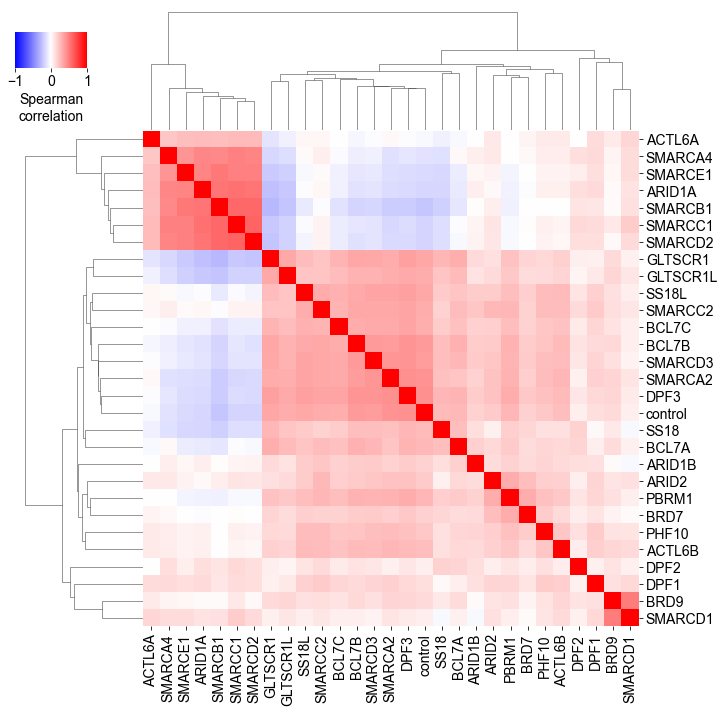

In [47]:
corrmat=adata.uns['bulk.gene.compact.filtered.corr']
show=list(set(corrmat.columns).difference(set(['unassigned'])))


import seaborn as sns
x=1
sns.clustermap(corrmat.loc[show,show],cmap='bwr',
               xticklabels=True,yticklabels=True,
               cbar_pos=(0.01, 0.9, 0.1, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Spearman\ncorrelation",
                'ticks':[-x,0,x]},
              vmin=-x,vmax=x)

plt.savefig(FIGS+'corr.gene.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'corr.gene.heatmap.png',transparent=True,bbox_inches='tight')
